# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos


        


**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

In [110]:
# Librerias
import pandas as pd
import numpy as np
from sklearn import *
from scipy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Lectura CSV
wineCSV = pd.read_csv('wine_fraud.csv')

# head del archivo
wineCSV.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [112]:
# Tipos de datos en columnas
intConteo = 0
stringConteo = 0
floatConteo = 0
for i in wineCSV.columns:
    if wineCSV[i].dtype == 'int64':
        intConteo += 1
    if wineCSV[i].dtype == 'object':
        stringConteo += 1
    if wineCSV[i].dtype == 'float64':
        floatConteo += 1
        
print('Cantidad de variables tipo int: ', intConteo)
print('Cantidad de variables tipo string: ', stringConteo)
print('Cantidad de variables tipo float: ', floatConteo)
print('\nTotal de variables clasificadas: ', intConteo + stringConteo + floatConteo)
print("Total columnas en dataset:" , wineCSV.shape[1])

Cantidad de variables tipo int:  0
Cantidad de variables tipo string:  2
Cantidad de variables tipo float:  11

Total de variables clasificadas:  13
Total columnas en dataset: 13


In [113]:
# Escalar datos

Escalador = preprocessing.StandardScaler()

wineCSV[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = Escalador.fit_transform(wineCSV[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values)

wineCSV.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,Legit,red
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,Legit,red
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,Legit,red
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,Legit,red
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,Legit,red


In [114]:
# Elminación de datos repetidos

wineCSV.drop_duplicates(inplace=True)

# Eliminación de datos nulos

wineCSV.dropna(inplace=True)

1    0.955639
0    0.044361
Name: quality, dtype: float64


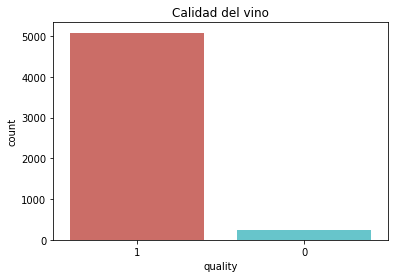

In [159]:
# Gráficos exploratorios
calidadVino =sns.countplot(x='quality', data=wineCSV, palette='hls', order=wineCSV['quality'].value_counts().index)
calidadVino.set_title('Calidad del vino')

porcentajeCalidad = wineCSV['quality'].value_counts(normalize=True)
print(porcentajeCalidad)


In [116]:
# Hacer encoding para quality
encoder = preprocessing.LabelEncoder()
wineCSV['quality'] = encoder.fit_transform(wineCSV['quality'])

Text(0.5, 1.0, 'Calidad del vino')

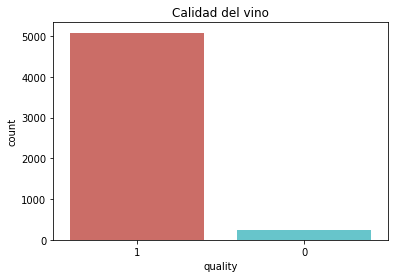

In [117]:
# Gráficos exploratorios
calidadVino =sns.countplot(x='quality', data=wineCSV, palette='hls', order=wineCSV['quality'].value_counts().index)
calidadVino.set_title('Calidad del vino')


Text(0.5, 1.0, 'Tipo de vino')

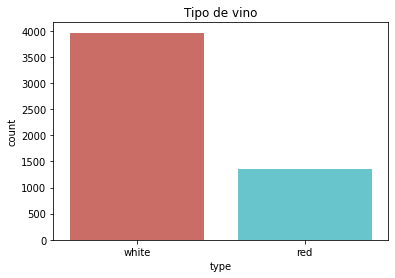

In [118]:
# Gráficos exploratorios
tipoVino =sns.countplot(x='type', data=wineCSV, palette='hls', order=wineCSV['type'].value_counts().index)
tipoVino.set_title('Tipo de vino')

In [119]:
# Hacer encoding para type
encoder = preprocessing.LabelEncoder()
wineCSV['type'] = encoder.fit_transform(wineCSV['type'])

In [133]:
wineCSV.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1,0
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,1,0


1    0.744549
0    0.255451
Name: type, dtype: float64


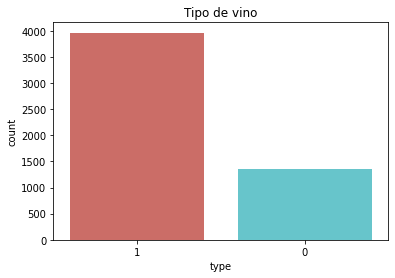

In [161]:
# Gráficos exploratorios
tipoVino =sns.countplot(x='type', data=wineCSV, palette='hls', order=wineCSV['type'].value_counts().index)
tipoVino.set_title('Tipo de vino')

porcentajeTipo = wineCSV['type'].value_counts(normalize=True)
print(porcentajeTipo)

Text(0.5, 1.0, 'Distribución de pH en el vino')

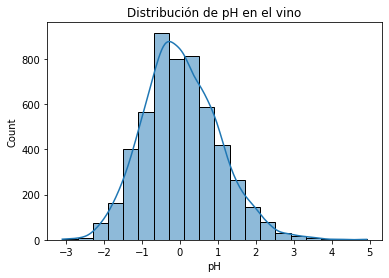

In [121]:
# Gráficos exploratorios
pH_Vino =sns.histplot(wineCSV["pH"], kde=True, bins=20)
pH_Vino.set_title("Distribución de pH en el vino")

Text(0.5, 1.0, 'Distribution de contenido alcoholico en el vino')

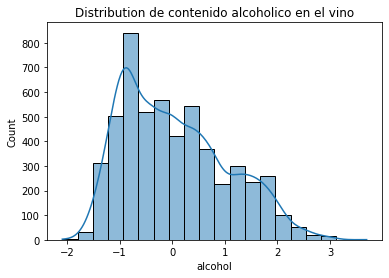

In [122]:
# Gráficos exploratorios

alcohol =sns.histplot(wineCSV["alcohol"], kde=True, bins=20)
alcohol.set_title("Distribution de contenido alcoholico en el vino")

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

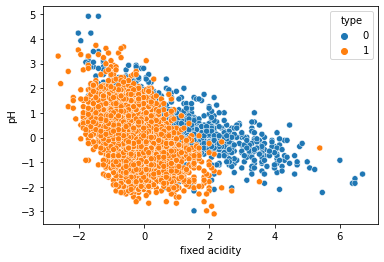

In [123]:
# Gráficos exploratorios

sns.scatterplot(x="fixed acidity", y="pH", hue="type", data=wineCSV)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

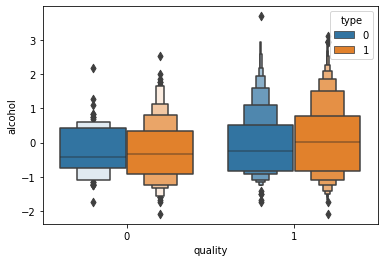

In [124]:
# Gráfico exploratorio
sns.boxenplot(x="quality", y="alcohol", hue="type", data=wineCSV)

In [125]:
# Estadística descriptiva
wineCSV.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,-0.000099,0.027115,-0.000956,-0.082977,0.018726,-0.027533,-0.028939,-0.053806,0.038331,0.014039,0.048163,0.955639,0.744549
std,1.018002,1.022017,1.012736,0.945925,1.052308,1.003212,1.004542,0.989015,0.997539,1.006375,0.994393,0.205915,0.436155
min,-2.634589,-1.577330,-2.192833,-1.018034,-1.342639,-1.663583,-1.941780,-2.530192,-3.100615,-2.091935,-2.089350,0.000000,0.000000
25%,-0.628933,-0.666161,-0.541153,-0.765798,-0.514799,-0.818419,-0.738613,-0.832644,-0.674862,-0.680592,-0.831615,1.000000,0.000000
50%,-0.166089,-0.240949,-0.059414,-0.576620,-0.257883,-0.142287,0.004519,-0.015553,-0.052874,-0.142937,-0.076974,1.000000,1.000000
75%,0.373895,0.427241,0.559966,0.432326,0.284496,0.590188,0.663607,0.691481,0.693511,0.461924,0.761516,1.000000,1.000000
max,6.699425,7.534354,9.231281,12.686822,15.842187,14.563567,5.737257,14.768791,4.923029,9.870879,3.696231,1.000000,1.000000


In [126]:
# Correlación entre variables

correlacion = wineCSV.corr()
wineCSV.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.025957,-0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.160332,-0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.067037,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,0.041803,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.034605,-0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.088387,0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,0.037892,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.028054,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,-0.018783,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.037451,-0.490364


<AxesSubplot:>

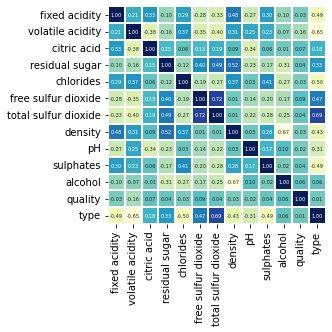

In [127]:
sns.heatmap(correlacion, annot=True, cmap="YlGnBu", linewidths=2, annot_kws={'size':5}, fmt='.2f', cbar=False, square=True)

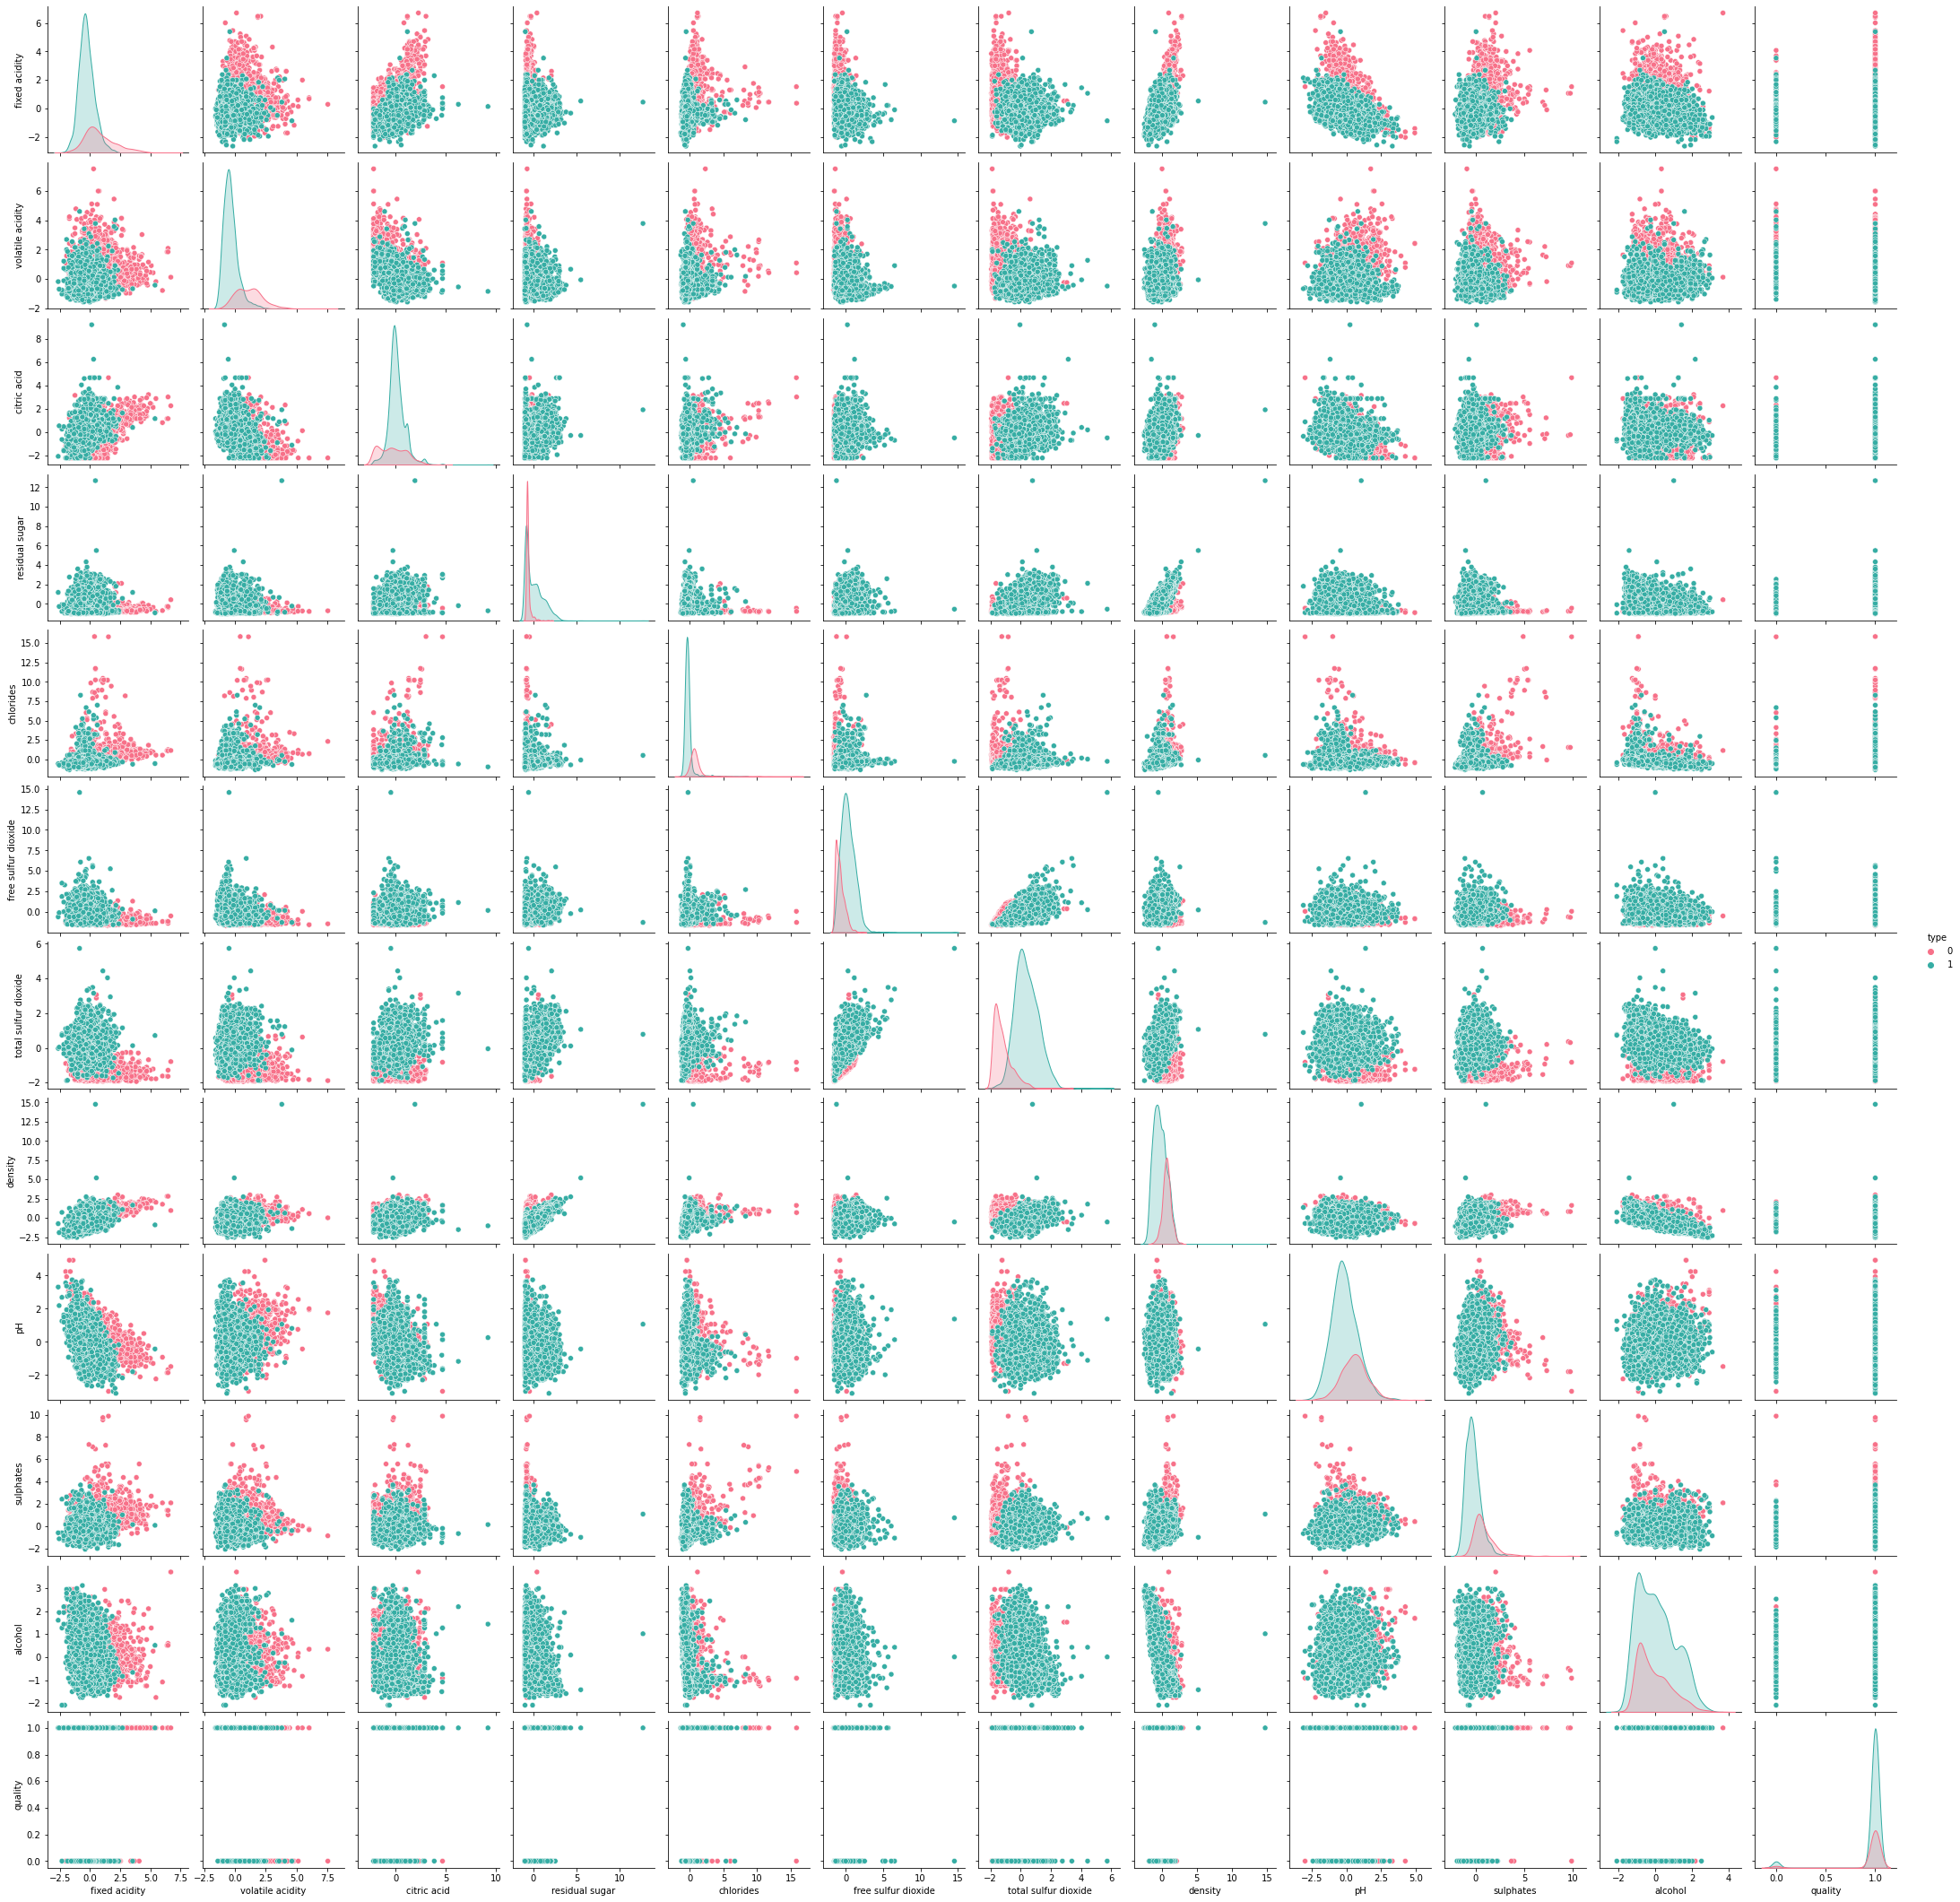

In [128]:
sns.pairplot(wineCSV, hue="type", palette="husl")

<AxesSubplot:xlabel='density', ylabel='pH'>

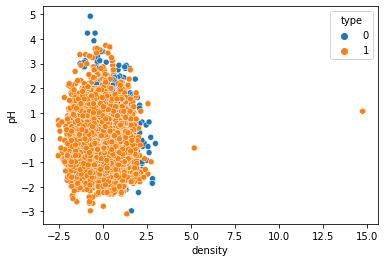

In [129]:
# Gráfico exploratorio

sns.scatterplot(x="density", y="pH", hue="type", data=wineCSV)

<AxesSubplot:xlabel='alcohol', ylabel='residual sugar'>

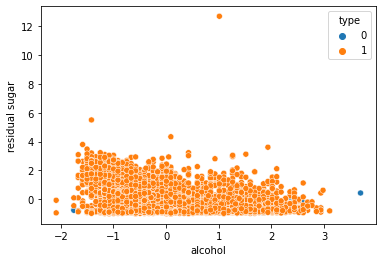

In [130]:
# Gráfico exploratorio

sns.scatterplot(x="alcohol", y="residual sugar", hue="type", data=wineCSV)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

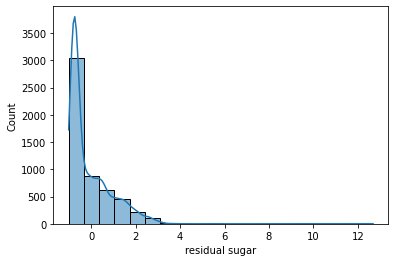

In [131]:
# Gráfico exploratorio:

sns.histplot(wineCSV["residual sugar"], kde=True, bins=20)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

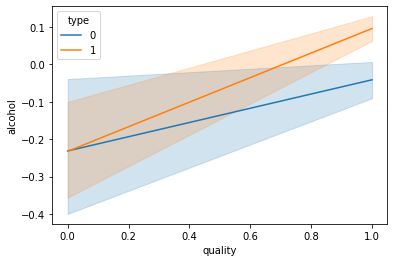

In [132]:
sns.lineplot(x="quality", y="alcohol", hue="type", data=wineCSV)

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento

In [165]:
# SVM Polinomial

# Variables independientes
X = wineCSV[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Variable objetivo
y = wineCSV['quality'] 

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Modelo SVM
SVMModel = svm.SVC(kernel='poly', degree=5, C=1.0, gamma='auto', class_weight='balanced')
SVMModel.fit(X_train, y_train)

# Predicción
y_pred = SVMModel.predict(X_test)
# Metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
# Matriz de confusión
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)



In [150]:
# Accuracy
print("Accuracy modelo SVM Polinomial:", accuracy)

Accuracy modelo SVM Polinomial: 0.9110275689223057


In [164]:
# Precision
print("Precision modelo SVM Polinomial:",precision )

Precision modelo SVM Polinomial: 0.9355852569428964


In [166]:
#F1

print("F1 modelo SVM Polinomial:",f1)

F1 modelo SVM Polinomial: 0.9224521697298468


<AxesSubplot:>

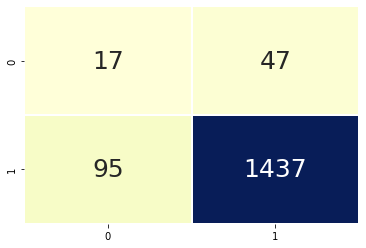

In [157]:
sns.heatmap(confusionMatrix, annot=True, cbar=False, cmap="YlGnBu", linewidths=2, annot_kws={'size':25}, fmt='d')

**(14 puntos) Hallazgos y conclusiones.**

Hallazgos de análisis exploratorio:
- Se encontró que, entre la data obtenida, el 95% de los datos corresponden a vino real, mientras que el 4.43% corresponden a vinos falsos.
- Así mismo, entre la data, el vino blanco tiene mayor presencia, con un 74.45% de datos correspondientes a este; mientras que para el vino rojo la data corresponde al 25% aproximadamente.


Conclusiones:
